In [ ]:
import os,sys,inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0, parent_dir) 

from mime import *
import pmlb
import pandas as pd
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [ ]:
x,y = pmlb.fetch_data('iris', return_X_y=True)
data = pd.DataFrame(x)
mime = Mime(data,y)
blackBox = SVC()
blackBox.fit(x[:100], y[:100])
explanation = mime.explain(x[101], blackBox.predict)
print(explanation)

([1.0188579165492349, 0.9470064039267783, 3.2682458133031043, 1.4164345700457837], array([0]))


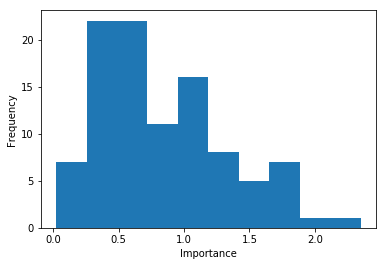

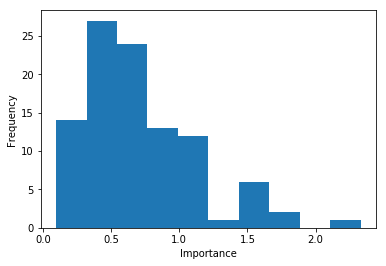

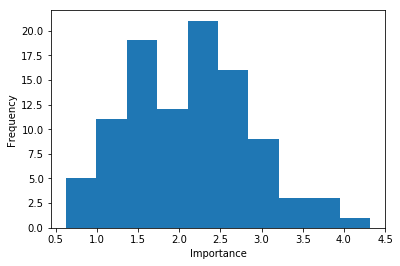

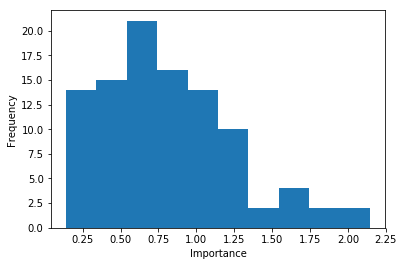

In [ ]:
all_explanations = []
for i in range(100):
    explanation, pred = mime.explain(x[101], blackBox.predict)
    #print(explanation, pred)
    all_explanations.append(explanation)

importance_distributions = [list(column) for column in zip(*all_explanations)]
for feature in importance_distributions:
    plt.hist(feature)
    plt.xlabel("Importance")
    plt.ylabel("Frequency")
    plt.xlim(0, 5)
    plt.show()